In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

pyplot.style.use(['dark_background'])

In [3]:
data = pd.DataFrame(data={"x1": np.linspace(0, 9, 500), "x2": np.linspace(-8, 8, 500)})
data.head()

,x1,x2
0,0.000000,-8.000000
1,0.018036,-7.967936
2,0.036072,-7.935872
3,0.054108,-7.903808
4,0.072144,-7.871743


In [4]:
def calculate_y(x1, x2):
    return np.cos(x1) * x2 ** 3

data["y"] = data.apply(lambda x: calculate_y(x[0], x[1]), axis=1)
data.head()

,x1,x2,y
0,0.000000,-8.000000,-512.000000
1,0.018036,-7.967936,-505.786052
2,0.036072,-7.935872,-499.460684
3,0.054108,-7.903808,-493.029641
4,0.072144,-7.871743,-486.498618


In [5]:
data.to_csv("../Datasets/dataset.scv", index=False)

FileNotFoundError: [Errno 2] No such file or directory: '../Datasets/dataset.scv'

In [5]:
scv_data = pd.read_csv("../Datasets/dataset.scv")
scv_data.head()

,x1,x2,y
0,0.000000,-8.000000,-512.000000
1,0.018036,-7.967936,-505.786052
2,0.036072,-7.935872,-499.460684
3,0.054108,-7.903808,-493.029641
4,0.072144,-7.871743,-486.498618


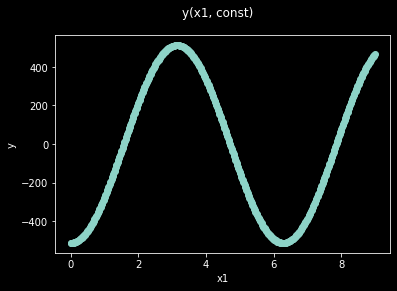

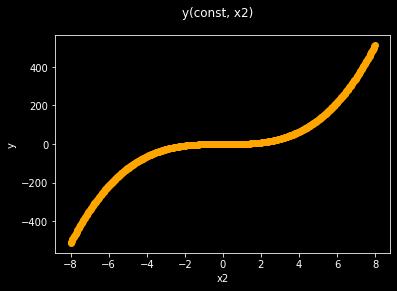

In [6]:
chart_data_x1 = scv_data.apply(lambda x: calculate_y(x[0], scv_data["x2"][0]), axis=1)
chart_data_x2 = scv_data.apply(lambda x: calculate_y(scv_data["x1"][0], x[1]), axis=1)

pyplot.suptitle("y(x1, const)")
pyplot.xlabel("x1")
pyplot.ylabel("y")
pyplot.plot(scv_data["x1"], chart_data_x1, "o")
pyplot.show()

pyplot.suptitle("y(const, x2)")
pyplot.xlabel("x2")
pyplot.ylabel("y")
pyplot.plot(scv_data["x2"], chart_data_x2, "o", color="orange")
pyplot.show()

In [7]:
pd.DataFrame(data={"min": scv_data.min(), "max": scv_data.max(), "mean": scv_data.mean()})

,min,max,mean
x1,0.0,9.000000,4.500000e+00
x2,-8.0,8.000000,-4.547474e-16
y,-512.0,67.696162,-4.970787e+01


In [8]:
mean_x1 = scv_data["x1"].mean()
mean_x2 = scv_data["x2"].mean()
trimmed = scv_data[(scv_data["x1"] < mean_x1) | (scv_data["x2"] < mean_x2)]
trimmed.to_csv("trimmed_dataset.csv", index=False)

print(len(trimmed))
trimmed.head()

250


,x1,x2,y
0,0.000000,-8.000000,-512.000000
1,0.018036,-7.967936,-505.786052
2,0.036072,-7.935872,-499.460684
3,0.054108,-7.903808,-493.029641
4,0.072144,-7.871743,-486.498618


In [1]:
figure = pyplot.figure().gca(projection="3d")

X1, X2 = np.meshgrid(scv_data["x1"], scv_data["x2"])
Y = calculate_y(X1, X2)
figure.plot_surface(X1, X2, Y)

figure.set_xlabel("X1", color="red")
figure.set_ylabel("X2", color="green")
figure.set_zlabel("Y", color="orange")
pyplot.show()

NameError: name 'pyplot' is not defined